# 📑 Table of Contents
1. [Introduction](#Introduction)
2. [Import Libraries](#Import-Libraries)
3. [Load Dataset](#Load-Dataset)
4. [Data Overview](#Data-Overview)
5. [Data Cleaning](#Data-Cleaning)
6. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
   - [Missing Values](#Missing-Values)
   - [Summary Statistics](#Summary-Statistics)
   - [Detecting Outlier](#Detecting-Outlier)
   - [Correlation Heatmap](#Correlation-Heatmap)
   - [Distribution Plot](#Distribution-Plot)
   - [Handling Skewed Data](#Handling-Skewed-Data)
      - [Log Transformation](#Log-Transformation)
      - [Visualizing Before/After Transformation](#Visualizing-Before/After-Transformation)
   - [Categorical Analysis (Univariate Analysis)](#Categorical-Analysis-(Univariate-Analysis))
   - [Line Chart: Sales Over Time](#Line-Chart:-Sales-Over-Time)
   - [Clustered Bar Plot- Multvariate Analysis](#Clustered-Bar-Plot--Multvariate-Analysis)
7. [Conclusions](#Conclusions)

# Introduction 
This notebook performs **Exploratory Data Analysis (EDA)** on the **Nike Sales dataset**.
We will clean the data, explore relationships, and visualize insights.

# Import Libraries 

In [284]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load Dataset 

In [285]:
# Load the dataset
df = pd.read_csv("Nike_Sales_Uncleaned.csv")

# Display first 5 rows
df.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,2024-03-09,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,2024-07-09,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,04-10-2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,2024/09/12,Retail,Delhi,187.89


# Data Overview  

In [286]:
# Dataset Shape
print("Dataset Shape:", df.shape)

# Column Info
print("\nData Types:")
print(df.dtypes)

# Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary Stats
df.describe(include='all').transpose().head(10)

Dataset Shape: (2500, 13)

Data Types:
Order_ID              int64
Gender_Category      object
Product_Line         object
Product_Name         object
Size                 object
Units_Sold          float64
MRP                 float64
Discount_Applied    float64
Revenue             float64
Order_Date           object
Sales_Channel        object
Region               object
Profit              float64
dtype: object

Missing Values:
Order_ID               0
Gender_Category        0
Product_Line           0
Product_Name           0
Size                 510
Units_Sold          1235
MRP                 1254
Discount_Applied    1668
Revenue                0
Order_Date           616
Sales_Channel          0
Region                 0
Profit                 0
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order_ID,2500.0,NaN,NaN,NaN,3194.3524,749.972638,2000.0,2534.75,3192.5,3841.25,4499.0
Gender_Category,2500,3,Kids,841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Line,2500,5,Training,546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Name,2500,20,SuperRep Go,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,1990,10,L,513,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Units_Sold,1265.0,NaN,NaN,NaN,1.482213,1.696947,-1.0,0.0,2.0,3.0,4.0
MRP,1246.0,NaN,NaN,NaN,6039.863395,2315.746826,2006.63,4038.9025,6110.03,8022.1875,9996.22
Discount_Applied,832.0,NaN,NaN,NaN,0.631022,0.3655,0.0,0.32,0.615,0.9625,1.25
Revenue,2500.0,NaN,NaN,NaN,274.873716,2023.77355,-7561.59,0.0,0.0,0.0,37169.35
Order_Date,1884,1008,2024/12/16,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning 
Here we handle missing values, duplicates, and incorrect data types.

In [287]:
# Remove duplicates if any
df = df.drop_duplicates()



df['Order_Date']= df['Order_Date'].astype('datetime64[ns]').ffill() # filling missing value and setting correct data type

# splitting negative and positive values into two different attributes as sold and returned respectively.
df['Units_Sold_Positive']=df['Units_Sold'].clip(lower=0).fillna(0).astype('int')
df['Units_Returned']=df[df['Units_Sold']<0]['Units_Sold'].abs()
df['Units_Returned']=df['Units_Returned'].fillna(0).astype('int')

# dropping unit_sold 
df=df.drop(columns='Units_Sold', axis=1)

df['Discount_Applied']= df['Discount_Applied'].fillna(0)

#splitting negative and positive values into two different attributes as profit and loss respectively.
df['Loss']= df[df['Profit']<0]['Profit'].abs()
df['Loss']=df['Loss'].fillna(0)
df['Profit']=df['Profit'].clip(lower=0)

df["Revenue"] = df["Revenue"].clip(lower=0)


df['MRP'] = df['MRP'].fillna(df.groupby('Product_Line')['MRP'].transform('mean').round(2))

df['Size'] = df['Size'].fillna(df.groupby('Product_Line')['Size'].transform(lambda x: x.mode()[0]))


#consistency in date time
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

#consistency in Region
df['Region']= df['Region'].str.title()
df['Region']=df['Region'].replace(['Hyd','Hyderabad','hyderbad','Hyderbad'],'Hyderabad')
df['Region'].unique()

#consistency in Discount_Applied
df['Discount_Applied'] = df['Discount_Applied'].apply(lambda x: f"{x:.2f}")

df['Discount_Applied']=df['Discount_Applied'].astype(float)
df['Discount_Applied'].value_counts().sort_values(ascending=False)




def size_mapper(x):
    # keep existing text
    if x in ["M","L","XL"]:
        return x
    # convert numbers and bin
    x = int(x)
    if x <= 8:
        return "M"
    elif x <= 10:
        return "L"
    else:
        return "XL"

df["Size"] = df["Size"].apply(size_mapper)


print("Data cleaned successfully!")


Data cleaned successfully!


# Exploratory Data Analysis 

## Missing Values 

In [288]:
# Check missing values after cleaning
df.isnull().sum()

Order_ID               0
Gender_Category        0
Product_Line           0
Product_Name           0
Size                   0
MRP                    0
Discount_Applied       0
Revenue                0
Order_Date             0
Sales_Channel          0
Region                 0
Profit                 0
Units_Sold_Positive    0
Units_Returned         0
Loss                   0
dtype: int64

## Summary Statistics 

In [289]:
# Display summary statistics for numeric columns
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Order_ID,2500.0,3194.3524,2000.0,2534.75,3192.5,3841.25,4499.0,749.972638
MRP,2500.0,6039.670744,2006.63,6009.28,6040.65,6099.9075,9996.22,1634.586693
Discount_Applied,2500.0,0.210004,0.0,0.0,0.0,0.32,1.25,0.364519
Revenue,2500.0,321.025096,0.0,0.0,0.0,0.0,37169.35,1974.226329
Order_Date,2500,2024-11-25 04:03:04.320000,2023-07-26 00:00:00,2024-08-24 00:00:00,2024-12-17 00:00:00,2025-04-09 06:00:00,2025-12-07 00:00:00,NaN
Profit,2500.0,1508.863204,0.0,93.5325,1371.385,2660.645,3999.21,1303.309905
Units_Sold_Positive,2500.0,0.832,0.0,0.0,0.0,2.0,4.0,1.339438
Units_Returned,2500.0,0.082,0.0,0.0,0.0,0.0,1.0,0.27442
Loss,2500.0,132.850356,0.0,0.0,0.0,0.0,1199.45,294.592601


## Detecting Outlier

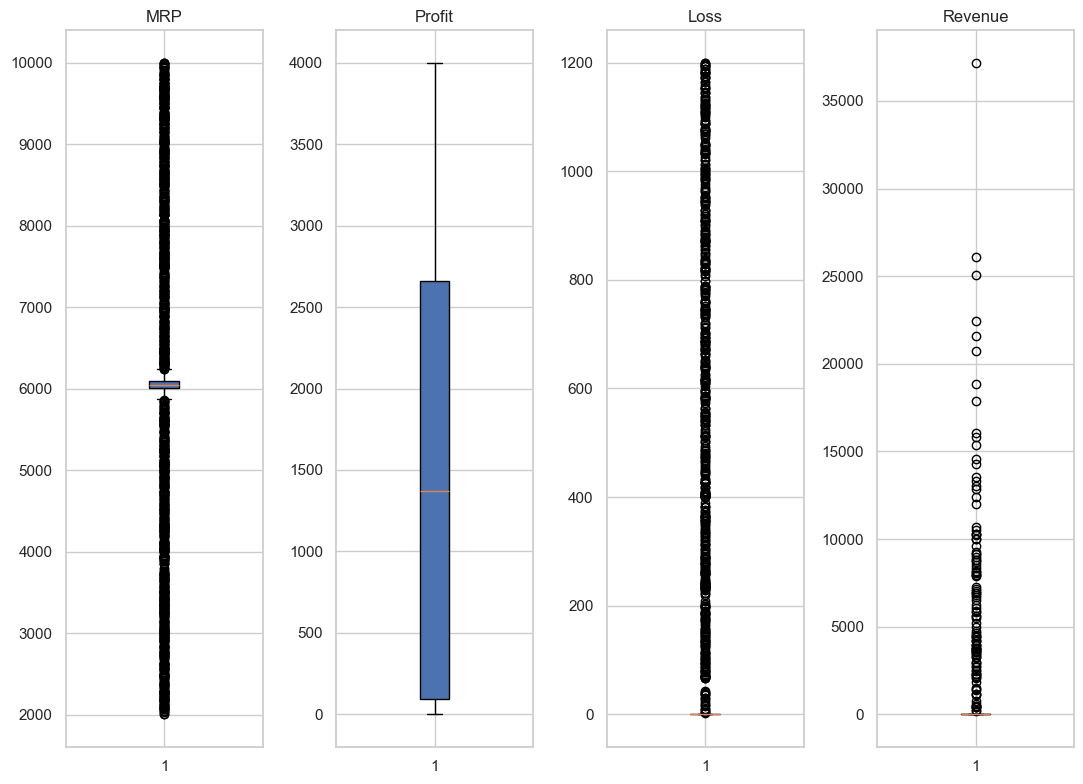

In [290]:
# finding outliers


plt.figure(figsize=(11,8))
plt.subplot(1,4,1)
plt.boxplot(df['MRP'],patch_artist=True)

plt.title('MRP')
plt.subplot(1,4,2)
plt.boxplot(df['Profit'],patch_artist=True)

plt.title('Profit')
plt.subplot(1,4,3)
plt.boxplot(df['Loss'] ,patch_artist=True)

plt.title('Loss')

plt.subplot(1,4,4)
plt.boxplot(df['Revenue'])

plt.title('Revenue')

plt.tight_layout()


plt.show()

## Correlation Heatmap 

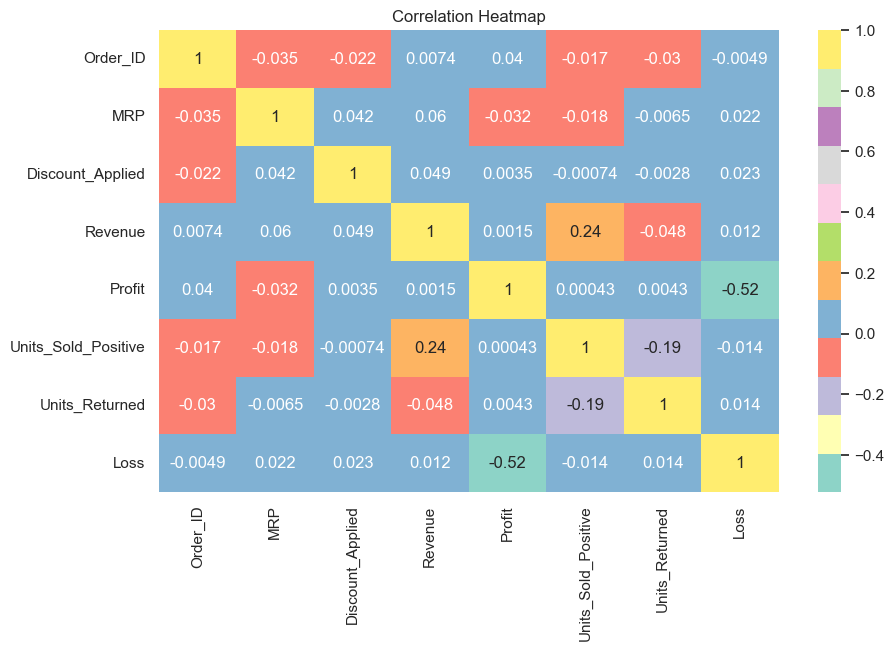

In [291]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Set3')
plt.title("Correlation Heatmap")
plt.show()

## Distribution Plot

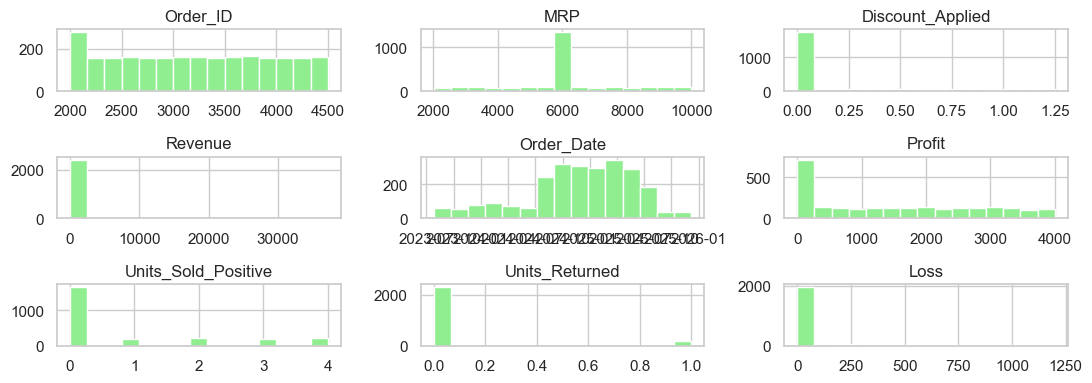

In [292]:


# Loop through and plot histograms
df.hist(bins=15, figsize=(11,4), color='lightgreen')
plt.tight_layout()
plt.show()



# Handling Skewed Data

## Log Transformation

In [293]:
# # Log Transformation for Skewed Data
import numpy as np

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Check skewness before transformation
print("Skewness before log transform:")
print(df[numeric_cols].skew())

# Apply log1p transformation (safe for zeros)
df_log = df.copy()
for col in numeric_cols:
    df_log[col] = np.log1p(df_log[col])

# Check skewness after transformation
print("\nSkewness after log transform:")
print(df_log[numeric_cols].skew())


Skewness before log transform:
Order_ID               0.020547
MRP                   -0.015123
Discount_Applied       1.542438
Revenue                8.979382
Profit                 0.299774
Units_Sold_Positive    1.343476
Units_Returned         3.048869
Loss                   2.226295
dtype: float64

Skewness after log transform:
Order_ID              -0.261677
MRP                   -1.179007
Discount_Applied       1.362857
Revenue                4.481535
Profit                -1.056183
Units_Sold_Positive    1.007820
Units_Returned         3.048869
Loss                   1.365729
dtype: float64


## Visualizing Before/After Transformation

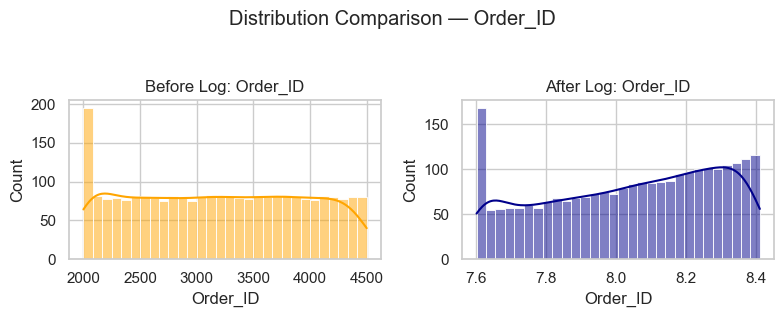

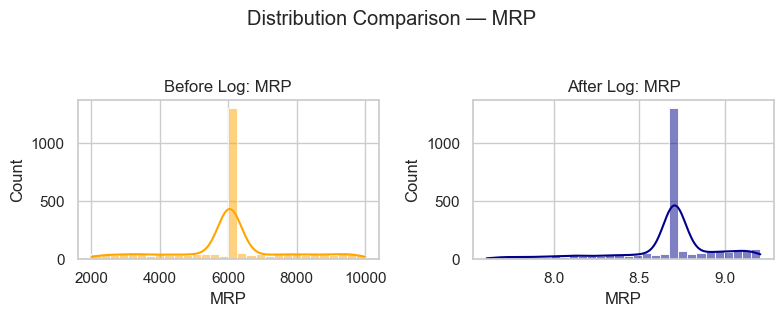

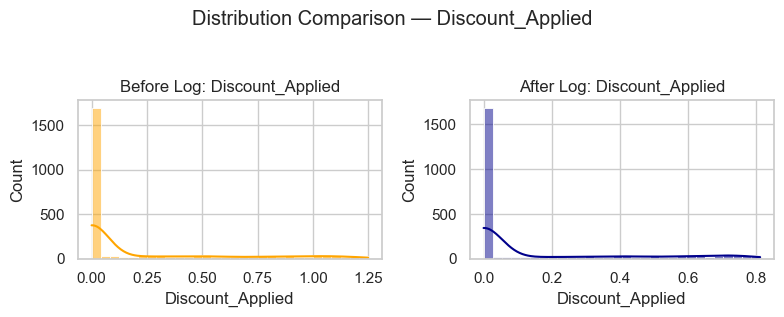

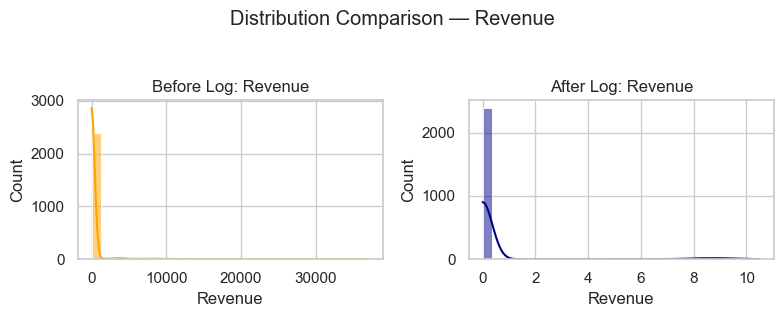

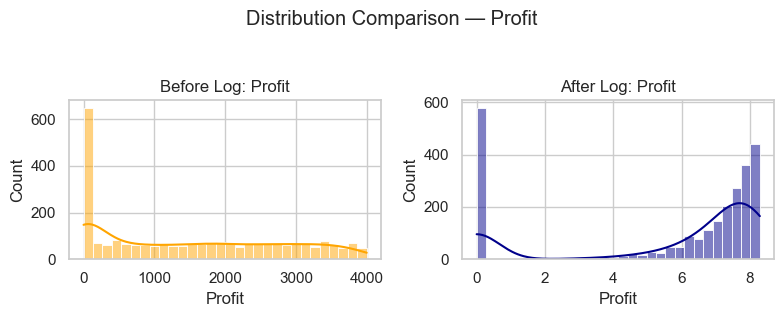

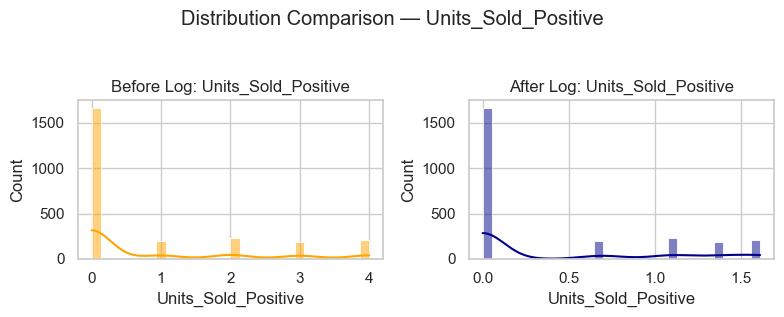

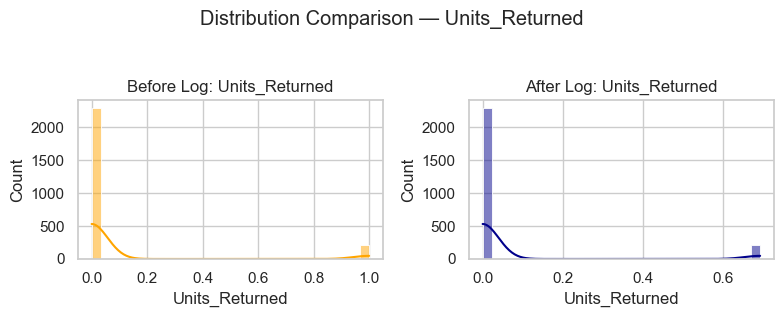

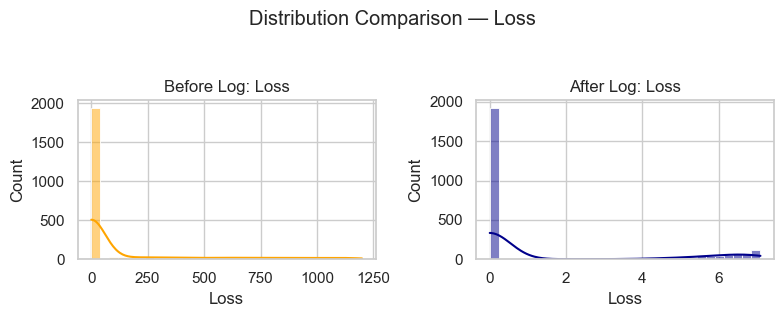

In [294]:
# Distributions BEFORE vs AFTER log transform (per numeric column)


num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
     
            fig, axes = plt.subplots(1, 2, figsize=(8, 3))
            sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[0], color= 'orange')
            axes[0].set_title(f"Before Log: {col}")
            sns.histplot(df_log[col].dropna(), bins=30, kde=True, ax=axes[1] , color = 'darkblue')
            axes[1].set_title(f"After Log: {col}")
            fig.suptitle(f"Distribution Comparison — {col}", y=1.05)
            plt.tight_layout()
            plt.show()
  


## Categorical Analysis (Univariate Analysis)

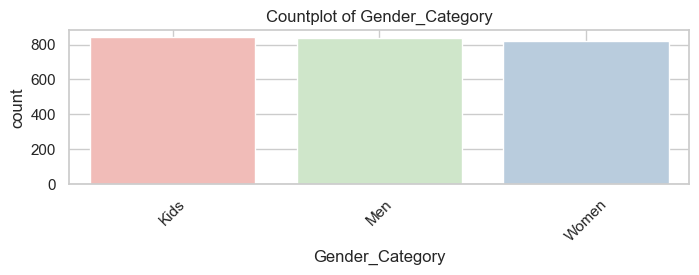

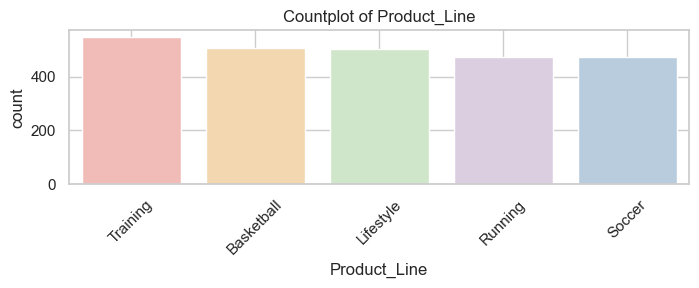

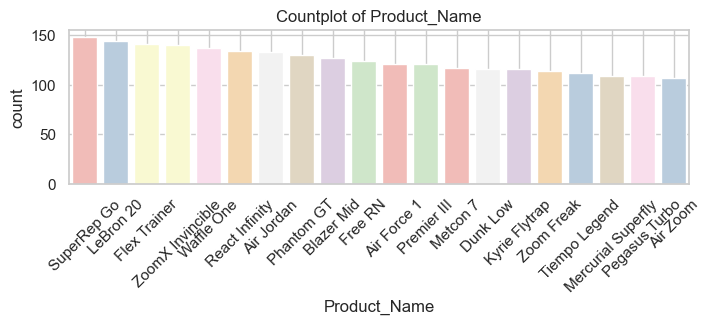

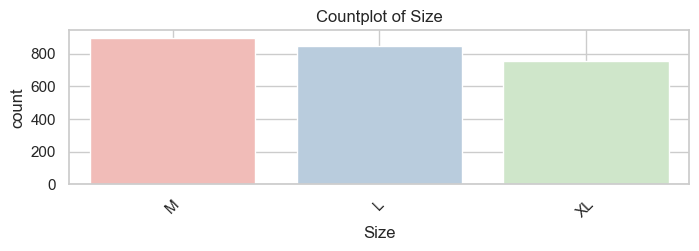

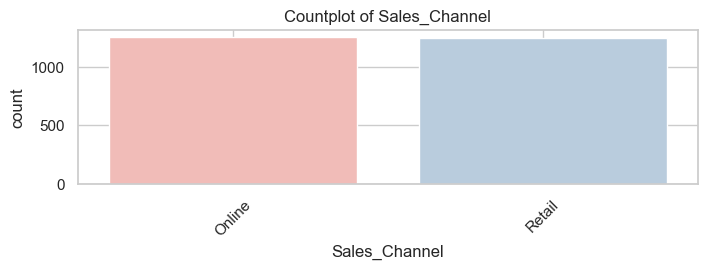

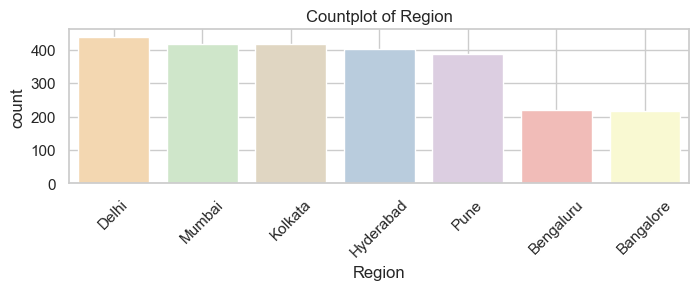

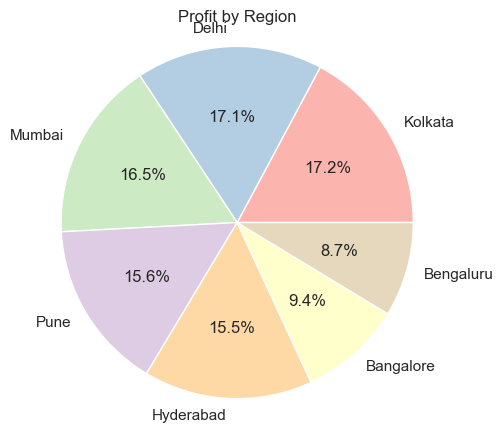

In [295]:
cat_cols = df.select_dtypes(include='object')#.columns[:3]  # show first 3 categorical columns
for col in cat_cols:
    plt.figure(figsize=(8,2))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Pastel1', hue=col)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

region_profit=df.groupby('Region')['Profit'].sum()
region_profit.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(5,5))
plt.pie(region_profit,labels=region_profit.index,autopct='%1.1f%%', colors=plt.cm.Pastel1.colors)
plt.axis('equal')
plt.title('Profit by Region')

plt.show()

## Line Chart: Sales Over Time

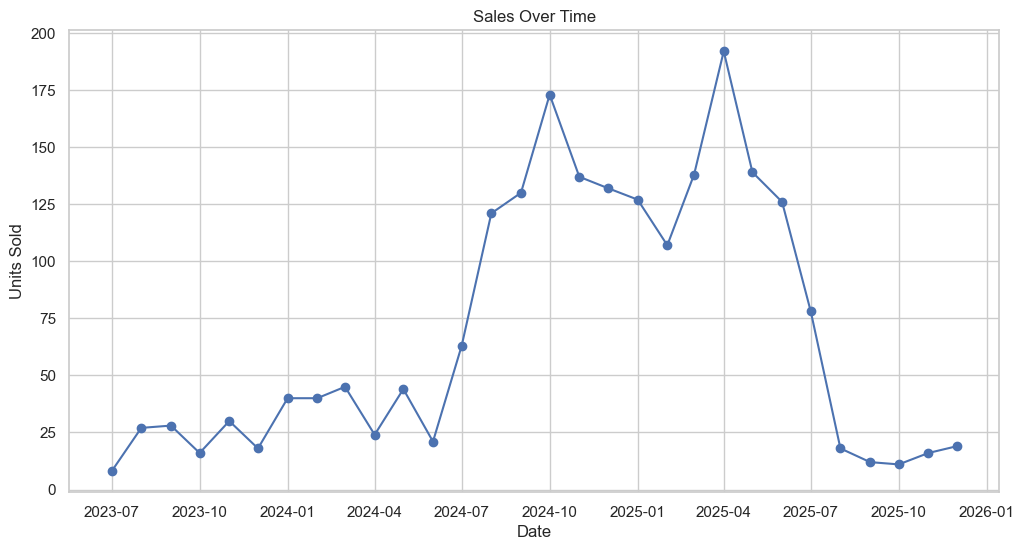

In [296]:

# Line Chart: Sales Over Time

tmp = df[['Order_Date','Units_Sold_Positive']].copy()


# Group by month
tmp['Order_Date'] = tmp['Order_Date'].dt.to_period("M")
sales_over_time = tmp.groupby('Order_Date')['Units_Sold_Positive'].sum().reset_index()

# Convert back to timestamp for plotting
sales_over_time['Order_Date'] = sales_over_time['Order_Date'].dt.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['Order_Date'], sales_over_time['Units_Sold_Positive'], marker='o')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()



## Clustered Bar Plot- Multvariate Analysis

<Figure size 1100x300 with 0 Axes>

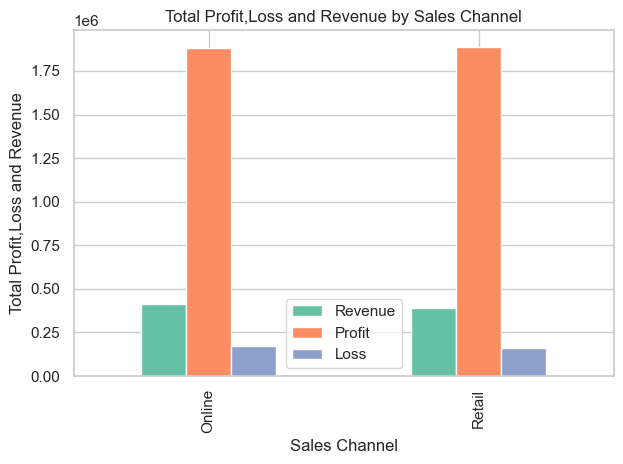

In [297]:
bar=df.groupby('Sales_Channel')[['Revenue','Profit','Loss']].sum()
plt.figure(figsize=(11,3))
bar.plot(kind='bar', color=plt.cm.Set2.colors)
plt.xlabel('Sales Channel')
plt.ylabel('Total Profit,Loss and Revenue')
plt.title('Total Profit,Loss and Revenue by Sales Channel')
plt.tight_layout()
plt.show()

# Conclusions  
- The dataset was successfully cleaned and explored.
- Identified key sales patterns and trends that can support **data-driven decision making**.  
- Distribution plots show skewed data in sales-related columns.
- Applied **log transformation** to reduce skewness in numerical data, improving distribution symmetry.  
- Categorical plots highlight product categories/regions contributing most to sales.

👉 These insights can guide **marketing, pricing, and inventory strategies**.